In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
train[train['Age'].isnull()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [9]:
pd.crosstab(train['Pclass'],train['Age'])

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Pclass,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,0,1,0,...,3,1,2,2,0,1,0,2,0,1
2,0,1,0,2,0,2,2,3,2,1,...,1,0,0,0,1,1,0,0,0,0
3,1,0,2,0,0,5,7,3,7,3,...,0,1,0,1,0,0,1,0,1,0


In [10]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [11]:
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [12]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [13]:
# train['Age'].value_counts()

In [14]:
# a=train

In [15]:
# a

In [16]:
for i in train[train['Age'].isnull()]['Pclass']==3:
    train['Age'].fillna(value=24.0,inplace=True)

In [17]:
for i in train[train['Age'].isnull()]['Pclass']==2:
    train['Age'].fillna(value=29.0,inplace=True)

In [18]:
for i in train[train['Age'].isnull()]['Pclass']==1:
    train['Age'].fillna(value=36.0,inplace=True)

In [19]:
train[train['Age'].isnull()]['Pclass'].value_counts()

Series([], Name: Pclass, dtype: int64)

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [23]:
train['Embarked'].fillna(value='S',inplace=True)

In [24]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
dtype: float64

In [26]:
a=pd.DataFrame()
a['Cabin']=train['Cabin']

In [27]:
train.drop('Cabin',axis=1,inplace=True)

In [28]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [30]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [31]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
train['Sex']=le.fit_transform(train['Sex'])

In [35]:
train['Embarked']=le.fit_transform(train['Embarked'])

In [36]:
train.head(2)    ## Male =1 , Embarked=s=2,c=0

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [38]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [39]:
train.drop('PassengerId',axis=1,inplace=True)

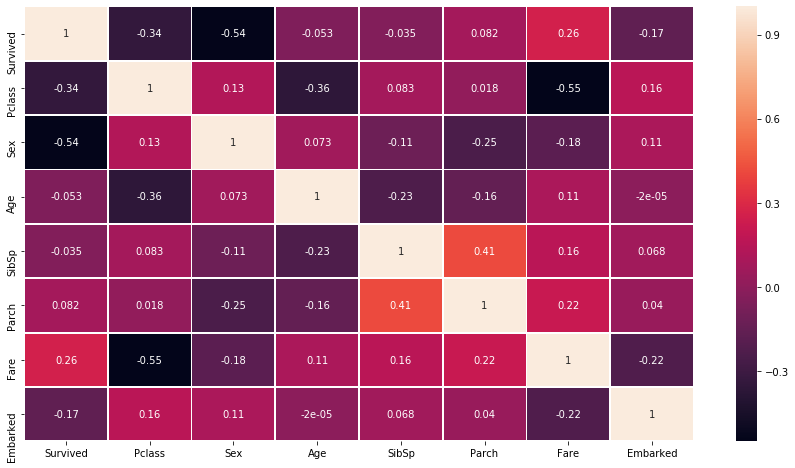

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,linewidths=0.8)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

In [41]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# from sklearn.preprocessing import StandardScaler

In [45]:
# sc=StandardScaler()

In [46]:
# X_train=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)

In [47]:
# X_test=pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr=LogisticRegression(max_iter=10000)

In [50]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pred=lr.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,accuracy_score

In [53]:
print(accuracy_score(y_test,pred))

0.8134328358208955


In [54]:
print(confusion_matrix(y_test,pred))

[[137  20]
 [ 30  81]]


In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [56]:
print(f1_score(y_test,pred))

0.7641509433962265


In [57]:
print(lr.score(X_train,y_train))

0.8009630818619583


In [58]:
print(lr.score(X_test,y_test))

0.8134328358208955


### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtc=DecisionTreeClassifier()

In [61]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
pred_dtc=dtc.predict(X_test)

In [63]:
print(accuracy_score(y_test,pred_dtc))

0.746268656716418


In [64]:
print(confusion_matrix(y_test,pred_dtc))

[[126  31]
 [ 37  74]]


In [65]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       157
           1       0.70      0.67      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.73      0.74       268
weighted avg       0.74      0.75      0.75       268



In [66]:
print(f1_score(y_test,pred_dtc))

0.6851851851851851


In [67]:
print(dtc.score(X_train,y_train))

0.9791332263242376


In [68]:
print(dtc.score(X_test,y_test))

0.746268656716418


### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc=RandomForestClassifier(n_estimators=500)

In [71]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
pred_rfc=rfc.predict(X_test)

In [73]:
print(accuracy_score(y_test,pred_rfc))

0.7873134328358209


In [74]:
print(confusion_matrix(y_test,pred_rfc))

[[132  25]
 [ 32  79]]


In [75]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.71      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [76]:
print(f1_score(y_test,pred_rfc))

0.7348837209302327


In [77]:
print(rfc.score(X_train,y_train))

0.9791332263242376


In [78]:
print(rfc.score(X_test,y_test))

0.7873134328358209


### Boosting

In [79]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [80]:
ada=AdaBoostClassifier(base_estimator=rfc)

In [81]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [82]:
pred_ada=ada.predict(X_test)

In [83]:
print(accuracy_score(y_test,pred_ada))

0.7686567164179104


In [84]:
print(confusion_matrix(y_test,pred_ada))

[[128  29]
 [ 33  78]]


In [85]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.73      0.70      0.72       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [86]:
print(f1_score(y_test,pred_ada))

0.7155963302752293


In [87]:
print(ada.score(X_train,y_train))

0.9791332263242376


In [88]:
print(ada.score(X_test,y_test))

0.7686567164179104


In [89]:
## Gbc

In [90]:
gbc=GradientBoostingClassifier()

In [91]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [92]:
pred_gbc=gbc.predict(X_test)

In [93]:
print(accuracy_score(y_test,pred_gbc))

0.8097014925373134


In [94]:
print(confusion_matrix(y_test,pred_gbc))

[[143  14]
 [ 37  74]]


In [95]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.67      0.74       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [96]:
print(f1_score(y_test,pred_gbc))

0.743718592964824


In [97]:
print(gbc.score(X_train,y_train))

0.9101123595505618


In [98]:
print(gbc.score(X_test,y_test))

0.8097014925373134


In [99]:
### KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn=KNeighborsClassifier()

In [102]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:
pred_knn=knn.predict(X_test)

In [104]:
print(accuracy_score(y_test,pred_knn))

0.7052238805970149


In [105]:
print(confusion_matrix(y_test,pred_knn))

[[133  24]
 [ 55  56]]


In [106]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       157
           1       0.70      0.50      0.59       111

    accuracy                           0.71       268
   macro avg       0.70      0.68      0.68       268
weighted avg       0.70      0.71      0.69       268



In [107]:
print(f1_score(y_test,pred_knn))

0.5863874345549738


In [108]:
print(knn.score(X_train,y_train))

0.7961476725521669


In [109]:
print(knn.score(X_test,y_test))

0.7052238805970149


In [110]:
## XGB

In [111]:
import xgboost as xgb

In [112]:
xgbc=xgb.XGBClassifier()

In [113]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
pred_xgbc=xgbc.predict(X_test)

In [115]:
print(accuracy_score(y_test,pred_xgbc))

0.7947761194029851


In [116]:
print(confusion_matrix(y_test,pred_xgbc))

[[132  25]
 [ 30  81]]


In [117]:
print(classification_report(y_test,pred_xgbc))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.76      0.73      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [118]:
print(f1_score(y_test,pred_xgbc))

0.7465437788018433


In [119]:
print(xgbc.score(X_train,y_train))

0.9695024077046549


In [120]:
print(xgbc.score(X_test,y_test))

0.7947761194029851


In [ ]:
from sklearn.model_selection import cross_validate

In [121]:
from sklearn.model_selection import cross_val_score

In [131]:
from sklearn import metrics
scores = cross_val_score(lr, X, y, cv=5, scoring='f1_macro')

In [132]:
scores

array([0.7759552 , 0.77262337, 0.76862314, 0.74725541, 0.80612662])

In [133]:
scores.mean()

0.7741167479084196

In [134]:
print(accuracy_score(y_test,pred))

0.8134328358208955


In [135]:
print(confusion_matrix(y_test,pred))

[[137  20]
 [ 30  81]]


In [136]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [137]:
print(f1_score(y_test,pred))

0.7641509433962265


In [138]:
print(lr.score(X_train,y_train))

0.8009630818619583


In [139]:
print(lr.score(X_test,y_test))

0.8134328358208955


In [140]:
## Test

In [141]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [142]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [143]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [144]:
test[test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [145]:
test[test['Age'].isnull()]['Pclass'].value_counts()

3    72
1     9
2     5
Name: Pclass, dtype: int64

In [146]:
pd.crosstab(test['Pclass'],test['Age'])

Age,0.17,0.33,0.75,0.83,0.92,1.00,2.00,3.00,5.00,6.00,...,58.00,59.00,60.00,60.50,61.00,62.00,63.00,64.00,67.00,76.00
Pclass,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,...,1,1,2,0,1,0,1,3,1,1
2,0,0,0,0,1,1,1,0,0,0,...,0,0,1,0,1,1,1,0,0,0
3,1,1,1,1,0,2,1,1,1,2,...,0,0,0,1,0,0,0,0,0,0


In [147]:
test[test['Pclass']==3]['Age'].mean()

24.02794520547945

In [148]:
test[test['Pclass']==2]['Age'].mean()

28.7775

In [149]:
test[test['Pclass']==1]['Age'].mean()

40.91836734693877

In [150]:
for i in test[test['Age'].isnull()]['Pclass']==3:
    test['Age'].fillna(value=24.0,inplace=True)

In [151]:
for i in test[test['Age'].isnull()]['Pclass']==2:
    test['Age'].fillna(value=29.0,inplace=True)

In [152]:
for i in test[test['Age'].isnull()]['Pclass']==1:
    test['Age'].fillna(value=41.0,inplace=True)

In [153]:
test[test['Age'].isnull()]['Pclass'].value_counts()

Series([], Name: Pclass, dtype: int64)

In [154]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [155]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [161]:
test[test['Pclass']==3]['Fare'].mean()

12.459677880184334

In [162]:
test['Fare'].fillna(value=12.45,inplace=True)

In [163]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [164]:
test.isnull().sum()/len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [165]:
b=pd.DataFrame()
b['Cabin']=test['Cabin']

In [166]:
test.drop('Cabin',axis=1,inplace=True)

In [167]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [168]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [169]:
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [170]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S


In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
le=LabelEncoder()

In [173]:
test['Sex']=le.fit_transform(test['Sex'])

In [174]:
test['Embarked']=le.fit_transform(test['Embarked'])

In [175]:
test.head(2)    ## Male =1 , Embarked=s=2,c=0

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2


In [176]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [177]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,28.982057,0.447368,0.392344,35.571741,1.401914
std,120.810458,0.841838,0.481622,12.887063,0.896760,0.981429,55.852006,0.854496
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [178]:
c=pd.DataFrame()
c['PassengerId']=test['PassengerId']

In [179]:
c

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [180]:
test.drop('PassengerId',axis=1,inplace=True)

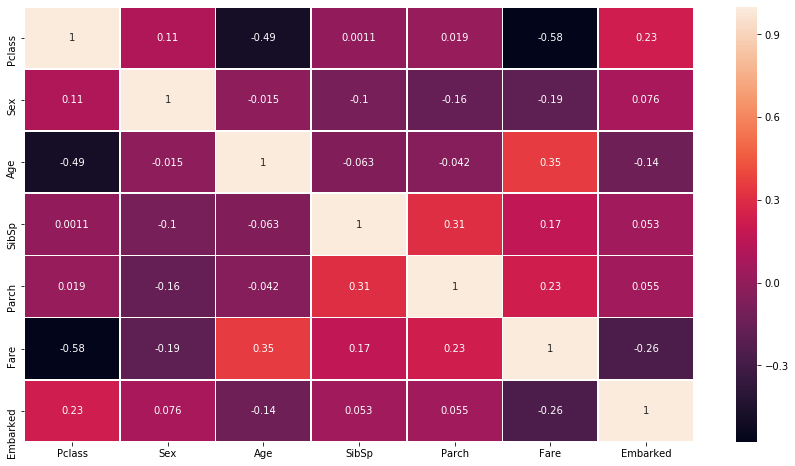

In [181]:
plt.figure(figsize=(15,8))
sns.heatmap(test.corr(),annot=True,linewidths=0.8)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

In [182]:
X_test1=test

In [183]:
pred_test=lr.predict(X_test1)

In [184]:
m=pred_test

In [ ]:
# new=df1

In [186]:
dataframe=pd.DataFrame()

In [ ]:
# dataframe['employee_id']=pd.Series(j)

In [187]:
dataframe['Survived']=pd.Series(m)

In [188]:
dataframe

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [189]:
final=pd.concat((c,dataframe),axis=1)

In [190]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [191]:
final.to_csv (r'C:\Users\lenovo\Desktop\Python\Kaggle\Titanic\export_dataframe.csv', index = False)